In [110]:
import numpy as np
import matplotlib.pyplot as plt

### Veri seti oluşturma ve grafik ile gösterme

In [111]:
ornek_sayisi = 100
theta_0 = -3
theta_1 = 0.5
X = np.linspace(-2, 2, ornek_sayisi)
y = theta_0 + (theta_1 * X) + np.random.normal(0, 0.05, size=ornek_sayisi)
print(X.shape, y.shape)

(100,) (100,)


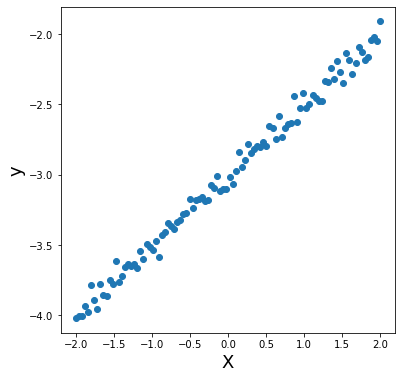

In [112]:
plt.figure(figsize=(6, 6))
plt.scatter(X, y)
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.show()

In [113]:
# verileri %80 - %20 olacak şekilde eğitim ve doğrulama verisi olarak ayır
egitim_ornek_sayisi = int(ornek_sayisi * 0.8)

X_egitim, X_val = X[:egitim_ornek_sayisi], X[egitim_ornek_sayisi:]
y_egitim, y_val = y[:egitim_ornek_sayisi], y[egitim_ornek_sayisi:]

print(f"X egitim: {X_egitim.shape}, X validasyon: {X_val.shape}")
print(f"y egitim: {y_egitim.shape}, y validasyon: {y_val.shape}")

X egitim: (80,), X validasyon: (20,)
y egitim: (80,), y validasyon: (20,)


### Doğrusal Regresyon ve Dereceli Alçalma

$$h_{\theta}(x) = \theta_0 + \theta_1x$$
$$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$$
$$\frac{\partial}{\partial \theta_0}J(\theta) = \frac{1}{m} \sum\limits_{i=1}^m (\theta_0+\theta_1x^{(i)}-y^{(i)})$$
$$\frac{\partial}{\partial \theta_1}J(\theta) = \frac{1}{m} \sum\limits_{i=1}^m (\theta_0+\theta_1x^{(i)}-y^{(i)}) \cdot x^{(i)}$$

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$


### 1 "Feature" için Doğrusal Regresyon

In [114]:
# https://github.com/python-engineer/MLfromscratch/ adresindeki örnekten uyarlanmıştır.


def hata_fonksiyonu(y_gercek, y_tahmin):
    ornek_sayisi = len(y_gercek)
    hata = 1 / (2 * ornek_sayisi) * np.sum((y_tahmin - y_gercek) ** 2)
    return hata


class LinearRegression_1_feature:
    def __init__(self, ogrenme_hizi):
        self.ogrenme_hizi = ogrenme_hizi
        self.theta_0 = None
        self.theta_1 = None

    def fit(self, X, y, tekrar_sayisi):
        ornek_sayisi = len(X)

        # parametrelere ilk değerlerini ata
        self.theta_0 = 0
        self.theta_1 = 0

        # grafiği hazırla
        plt.figure(figsize=(8, 8))
        plt.scatter(X, y)
        plt.xlabel("X", fontsize=18)
        plt.ylabel("y", fontsize=18)

        hatalar = []

        # gradient descent
        for i in range(tekrar_sayisi):
            y_tahmin = self.theta_0 + (self.theta_1 * X)

            # türevleri hesapla
            d_theta_0 = (1 / ornek_sayisi) * np.sum(y_tahmin - y)
            d_theta_1 = (1 / ornek_sayisi) * np.dot(X.T, (y_tahmin - y))

            # parametreleri güncelle
            self.theta_0 = self.theta_0 - self.ogrenme_hizi * d_theta_0
            self.theta_1 = self.theta_1 - self.ogrenme_hizi * d_theta_1

            # her 50 döngüde bir tahmin grafiğini göster
            if i % 50 == 0:
                plt.plot(X, y_tahmin)
                hata = hata_fonksiyonu(y, y_tahmin)
                hatalar.append(hata)

        plt.show()
        return hatalar

    def predict(self, X):
        y_tahmin = self.theta_0 + (self.theta_1 * X)
        return y_tahmin

    def get_params(self):
        return self.theta_0, self.theta_1


### Model Oluşturma ve Eğitme

In [115]:
model = LinearRegression_1_feature(0.01)

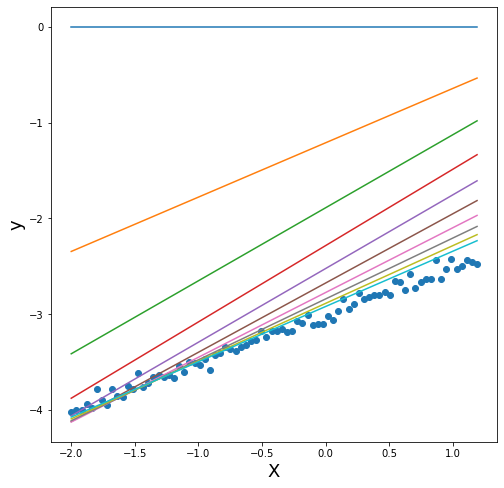

In [116]:
hatalar = model.fit(X_egitim, y_egitim, 500)

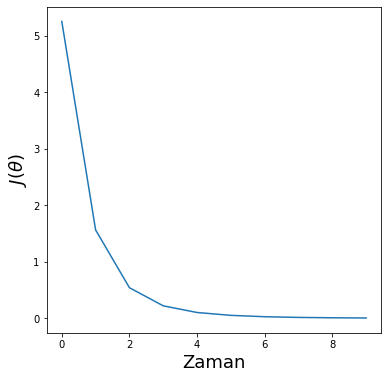

In [117]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(hatalar)), hatalar)
plt.xlabel("Zaman", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.show()

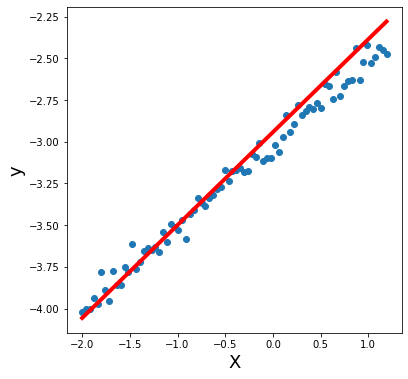

In [118]:
plt.figure(figsize=(6, 6))
plt.scatter(X_egitim, y_egitim)

plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=18)

y_tahmin = model.predict(X_egitim)
plt.plot(X_egitim, y_tahmin, color="red", linewidth=4)

plt.show()

### Model Doğrulama (Validasyon)

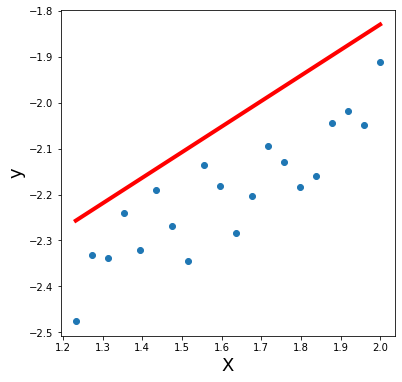

In [119]:
plt.figure(figsize=(6, 6))
plt.scatter(X_val, y_val)

plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=18)

y_tahmin = model.predict(X_egitim)
plt.plot(X_val, model.predict(X_val), color="red", linewidth=4)

plt.show()

In [120]:
def mean_squared_error(y_gercek, y_tahmin):
    return np.mean((y_gercek - y_tahmin) ** 2)

In [121]:
print(f"MSE: {mean_squared_error(y_val, model.predict(X_val))}")

MSE: 0.027288083618940445


In [122]:
print(f"Modelin öğrendiği parametreler: {model.get_params()}")

Modelin öğrendiği parametreler: (-2.942938649803652, 0.5566898569018579)


## 1'den çok "Feature" için Doğrusal Regresyon
### Veri seti hazırlama

In [123]:
ornek_sayisi = 100
theta_arr = np.array([3, -2, 5])

X = np.ones((ornek_sayisi, 3))
X[:,1] = np.linspace(-2, 1, ornek_sayisi).T
X[:,2] = np.linspace(1, 2, ornek_sayisi).T

y = np.dot(X, theta_arr.T)

print("İlk 5 X değeri:")
print(X[:5])
print("İlk 5 y değeri:")
print(y[:5])

İlk 5 X değeri:
[[ 1.         -2.          1.        ]
 [ 1.         -1.96969697  1.01010101]
 [ 1.         -1.93939394  1.02020202]
 [ 1.         -1.90909091  1.03030303]
 [ 1.         -1.87878788  1.04040404]]
İlk 5 y değeri:
[12.         11.98989899 11.97979798 11.96969697 11.95959596]


In [124]:
print(X.shape, y.shape)

(100, 3) (100,)


In [125]:
class LinearRegression:
    def __init__(self, ogrenme_hizi):
        self.ogrenme_hizi = ogrenme_hizi
        self.thetalar = None

    def fit(self, X, y, tekrar_sayisi):
        ornek_sayisi, feature_sayisi = X.shape

        # parametrelere ilk değerlerini ata
        self.thetalar = np.zeros(feature_sayisi)
        hatalar = []

        # gradient descent
        for i in range(tekrar_sayisi):
            y_tahmin = np.dot(X, self.thetalar.T)

            # türevleri hesapla
            d_thetalar = (1 / ornek_sayisi) * np.dot(X.T, (y_tahmin - y))

            # parametreleri güncelle
            self.thetalar = self.thetalar - self.ogrenme_hizi * d_thetalar

            # her 20 döngüde bir hatayı kaydet
            if i % 20 == 0:
                hata = hata_fonksiyonu(y, y_tahmin)
                hatalar.append(hata)

        return hatalar

    def predict(self, X):
        y_tahmin = np.dot(X, self.thetalar.T)
        return y_tahmin

    def get_params(self):
        return self.thetalar

In [126]:
lr_model = LinearRegression(0.01)
hatalar = lr_model.fit(X, y, 500)

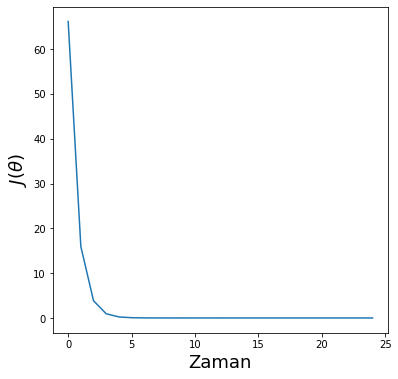

In [127]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(hatalar)), hatalar)
plt.xlabel("Zaman", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.show()

In [128]:
print("Öğrenilen Theta değerleri (doğru değerler: [3, -2, 5]:")
print(lr_model.get_params())

Öğrenilen Theta değerleri (doğru değerler: [3, -2, 5]:
[ 3.28571423 -1.93865844  4.8299709 ]
